In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
df = pd.read_csv(r"D:\Code\DA\Data Science\Projects\02. HousePricePrediction\kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## DELETE DUPLICATES (If They Exist)

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Delete Redundant Columns

In [6]:
df.drop(columns = ['id','date','view','zipcode'],axis = 1,inplace = True)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## CORRELATION MATRIX

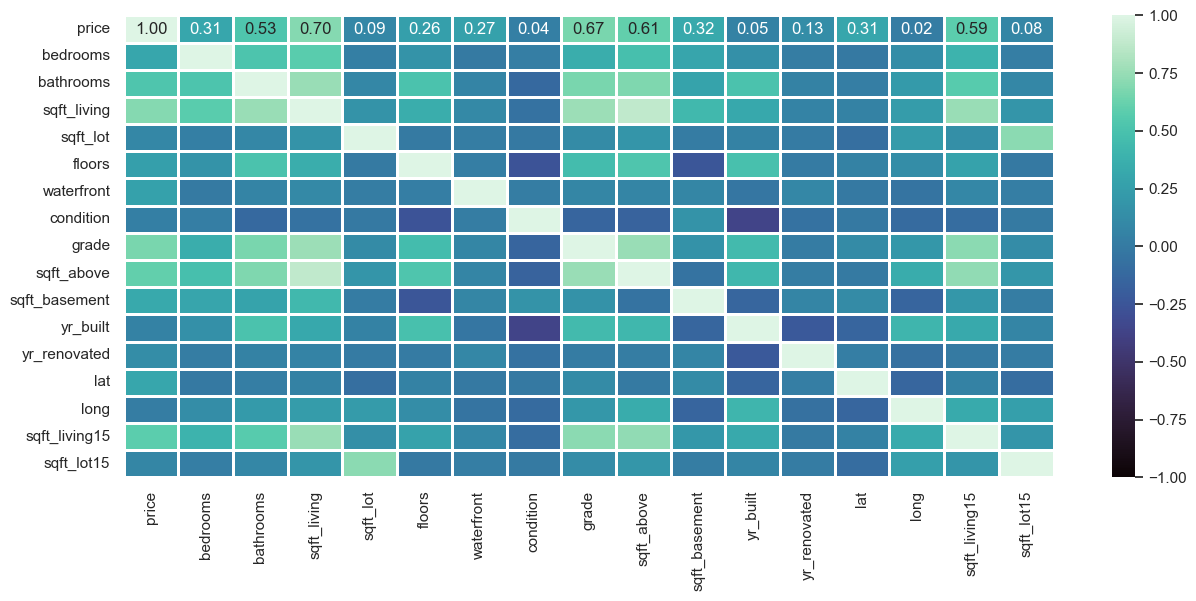

In [8]:
corr = df.corr()
plt.subplots(figsize = (15,6))
corr_matrix = sns.heatmap(corr,annot = True, cmap = 'mako' , linewidth = 2,fmt = '.2f' ,vmin=-1, vmax= 1)


In [9]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,3,7,1020,0,2008,0,47.5941,-122.299,1020,1357


## CHECK DATA DISTRIBUTION & ASSUMPTIONS


D:\Code\ANC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


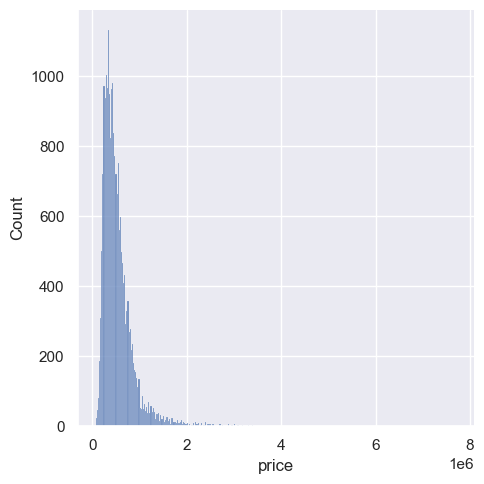

In [10]:
sns.displot(df['price'])

## LINEARITY

Text(0.5, 1.0, 'P VS bedrooms')

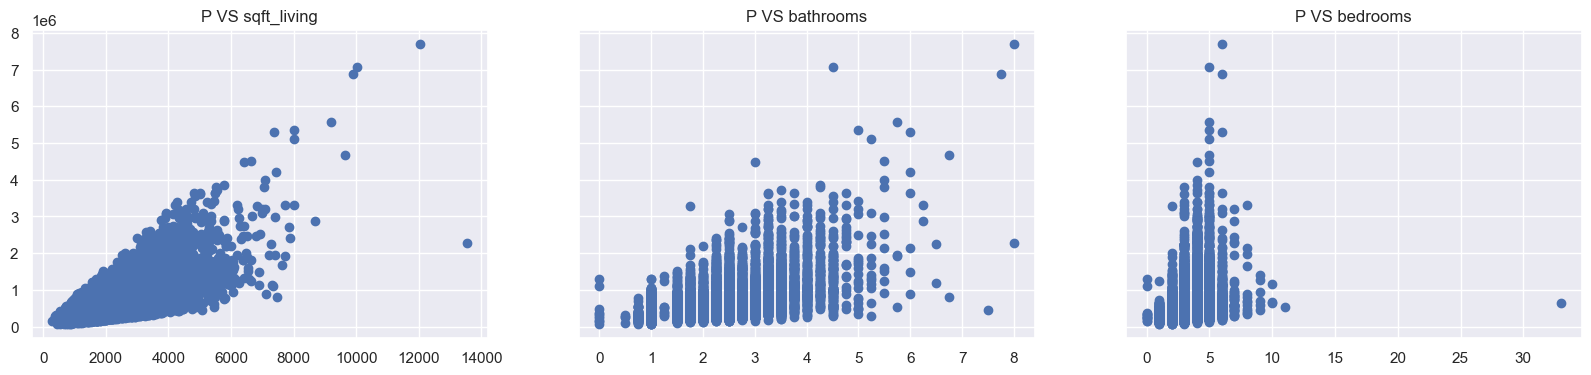

In [11]:
f, (a1,a2,a3) = plt.subplots(1,3,sharey = True, figsize = (20,4))
a1.scatter(df['sqft_living'],df['price'])
a1.set_title("P VS sqft_living")

a2.scatter(df['bathrooms'],df['price'])
a2.set_title("P VS bathrooms")

a3.scatter(df['bedrooms'],df['price'])
a3.set_title("P VS bedrooms")


Text(0.5, 1.0, 'P VS waterfront')

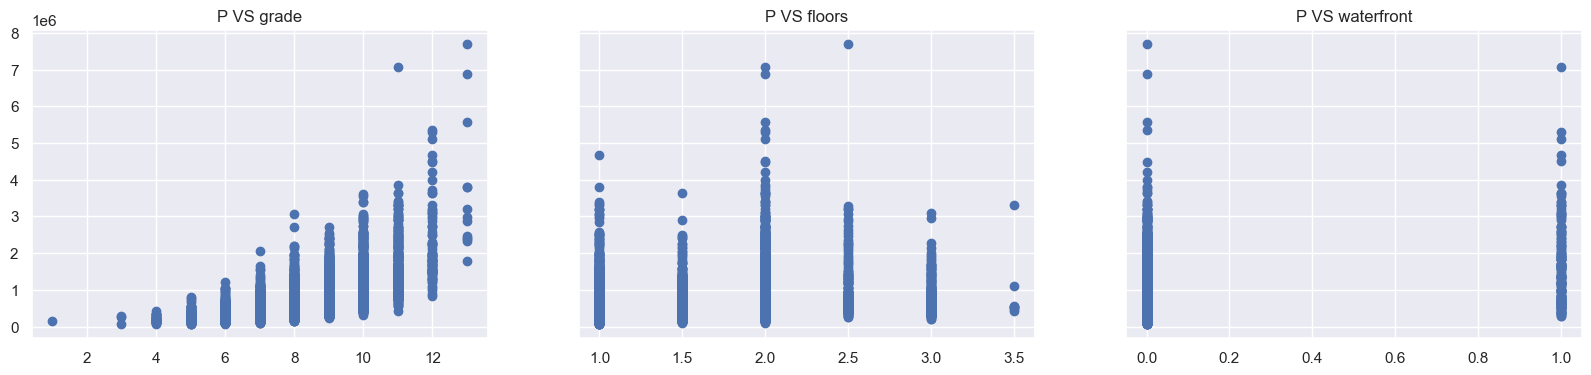

In [12]:
f, (a4,a5,a6) = plt.subplots(1,3,sharey = True, figsize = (20,4))
a4.scatter(df['grade'],df['price'])
a4.set_title("P VS grade")

a5.scatter(df['floors'],df['price'])
a5.set_title("P VS floors")

a6.scatter(df['waterfront'],df['price'])
a6.set_title("P VS waterfront")


From Above Graphs & Correlation Matrix, We Can see that sq_ft ,no of rooms & grade are key influencers in affecting the price of a house,
and they also share a linear relationship with the same


## CHECK MULTICOLLINEARITY

In [13]:
estimators = ['grade','sqft_living','bathrooms']
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vars = df[estimators]
vars = add_constant(vars)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(vars.values,i) for i in range(vars.shape[1])] 
vif['features'] = vars.columns

In [14]:
vif

,VIF,features
0,60.909866,const
1,2.501767,grade
2,3.241685,sqft_living
3,2.430875,bathrooms


### From VIF, we can see that all of our features have VIF < 5. Indicating absence of a strong multicolinearity

# LINEAR REGRESSION

## SCALE & STANDARDIZE THE DATA

In [15]:
target = np.log(df['price'])
inputs = df[estimators]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

In [18]:
scaled_inputs

array([[-0.55883575, -0.97983502, -1.44746357],
       [-0.55883575,  0.53363434,  0.1756067 ],
       [-1.40958711, -1.42625404, -1.44746357],
       ...,
       [-0.55883575, -1.15404732, -1.77207762],
       [ 0.29191561, -0.52252773,  0.50022075],
       [-0.55883575, -1.15404732, -1.77207762]])

## SPLIT DATA INTO TRAIN / TEST SET

In [19]:
x_train, x_test , y_train , y_test = train_test_split(scaled_inputs,target,test_size = 0.2, random_state = 5)

In [20]:
import statsmodels.api as sm

In [21]:
x = sm.add_constant(x_train)
model = sm.OLS(y_train,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     7156.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:54:11   Log-Likelihood:                -6417.2
No. Observations:               17290   AIC:                         1.284e+04
Df Residuals:                   17286   BIC:                         1.287e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0479      0.003   4891.393      0.000      13.043      13.053
x1             0.2230      0.004     52.840      0.000       0.215       0.231
x2             0.2091      0.005     43.503      0.000       0.200       0.219
x3            -0.0171      0.004     -4.115      0.000      -0.025      -0.009
==============================================================================
Omnibus:                       39.378   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.130
Skew:                           0.108   Prob(JB):                     3.18e-09
Kurtosis:                       2.911   Cond. No.                         3.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_hat = reg.predict(x_train)
score = reg.score(x_train,y_train)

In [25]:
y_hat

array([13.47634239, 12.42598175, 13.88081639, ..., 13.25247686,
       12.90056087, 12.75385353])

In [26]:
score

0.5539576319970286

#### From Looking At the above Value of R-Squared we can see that our model will predict the price of a house with an 55 % accuracy

In [27]:
estimators =  ['grade','sqft_living','bathrooms','yr_built','yr_renovated','bedrooms','sqft_living15','waterfront','sqft_lot','condition','floors','lat']
vars = df[estimators]
vars = add_constant(vars)
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(vars.values,i) for i in range(vars.shape[1])] 
vif['features'] = vars.columns

In [28]:
vif

,VIF,features
0,155023.800080,const
1,3.258806,grade
2,4.973262,sqft_living
3,3.249770,bathrooms
4,2.078473,yr_built
5,1.145320,yr_renovated
6,1.633934,bedrooms
7,2.666091,sqft_living15
8,1.029822,waterfront
9,1.056427,sqft_lot


In [29]:
inputs = df[estimators]

In [30]:
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

In [31]:
x_train, x_test , y_train , y_test = train_test_split(scaled_inputs,target,test_size = 0.2, random_state = 5)

In [32]:
x = sm.add_constant(x_train)
model = sm.OLS(y_train,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     4631.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:54:11   Log-Likelihood:                -955.91
No. Observations:               17290   AIC:                             1938.
Df Residuals:                   17277   BIC:                             2039.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0488      0.002   6706.610      0.000      13.045      13.053
x1             0.1963      0.004     55.840      0.000       0.189       0.203
x2             0.1292      0.004     29.829      0.000       0.121       0.138
x3             0.0585      0.004     16.672      0.000       0.052       0.065
x4            -0.1057      0.003    -37.546      0.000      -0.111      -0.100
x5             0.0179      0.002      8.499      0.000       0.014       0.022
x6            -0.0126      0.002     -5.117      0.000      -0.017      -0.008
x7             0.0737      0.003     23.255      0.000       0.067       0.080
x8             0.0480      0.002     24.357      0.000       0.044       0.052
x9             0.0146      0.002      7.096      0.000       0.011       0.019
x10            0.0454      0.002     21.072      0.000       0.041       0.050
x11            0.0313      0.002     12.722      0.000       0.027       0.036
x12            0.1879      0.002     92.054      0.000       0.184       0.192
==============================================================================
Omnibus:                      266.589   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.194
Skew:                           0.025   Prob(JB):                    2.99e-113
Kurtosis:                       3.847   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### By adding  additional inputs we can see that accuracy of our model has increased upto 76% .
#### Other inputs such as "sqft_above" showed a strong multicolinearity, hence we are ignoring them.

# Predictions

In [33]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'PREDICTIONS')

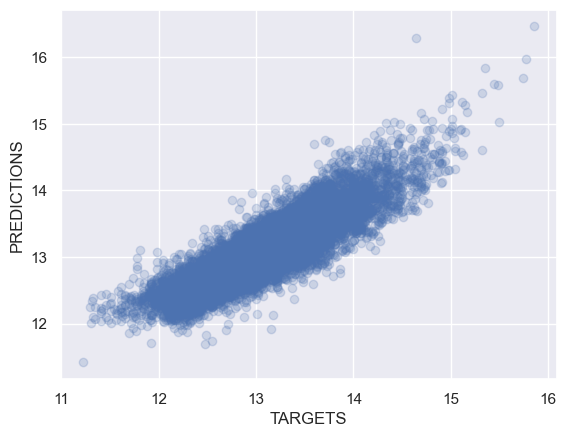

In [35]:
plt.scatter(y_train,y_hat,alpha=0.2)
plt.xlabel('TARGETS')
plt.ylabel('PREDICTIONS')

D:\Code\ANC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'RESIDUAL')

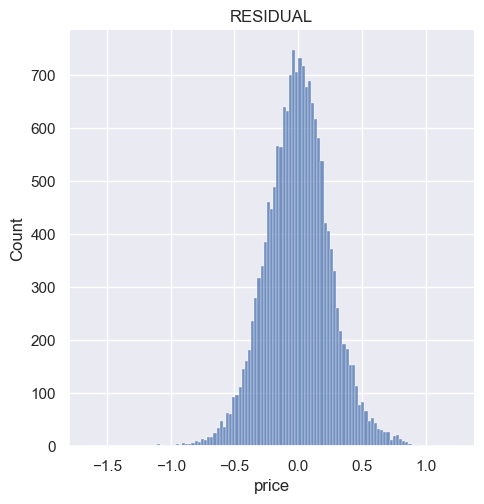

In [36]:
sns.displot(y_train - y_hat)
plt.title('RESIDUAL')

In [37]:
prediction = reg.predict(x_test)

In [38]:
prediction

array([12.7766252 , 12.41549672, 12.87452087, ..., 13.29610155,
       13.30540151, 13.12189753])

Text(0, 0.5, 'PREDICTIONS')

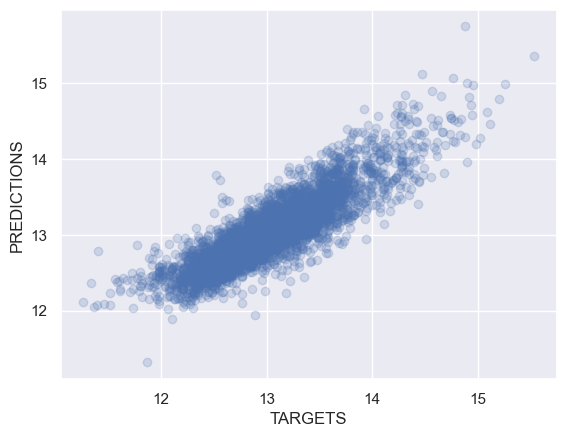

In [39]:
plt.scatter(y_test,prediction,alpha=0.2)
plt.xlabel('TARGETS')
plt.ylabel('PREDICTIONS')

D:\Code\ANC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'RESIDUAL')

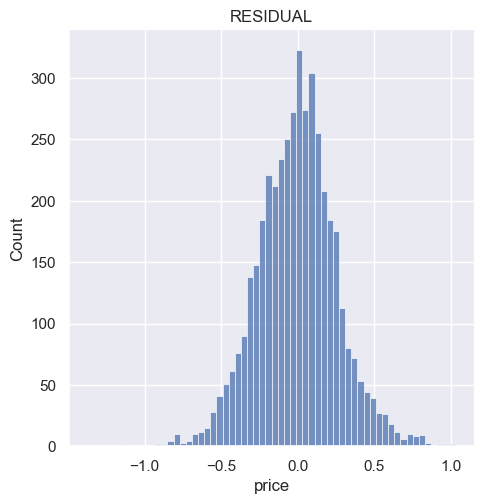

In [40]:
sns.displot(y_test - prediction)
plt.title('RESIDUAL')

In [41]:
reg.score(x_test,y_test)

0.7587571836959999

In [42]:
df_pf = pd.DataFrame(np.exp(prediction),columns = ['Prediction'])

In [43]:
df_pf['Prediction'] = df_pf['Prediction'].astype(np.float64)

In [44]:
y_test = y_test.reset_index(drop = True)
df_pf['Target'] = np.exp(y_test)

In [48]:
pd.options.display.float_format = '{:.0f}'.format

In [50]:
df_pf.head()

,Prediction,Target
0,353849,365000
1,246594,225000
2,390241,384950
3,533621,657500
4,1328072,959000


In [52]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [58]:
df_pf['Diff %'] = np.absolute((df_pf['Residual'] / df_pf['Target']) * 100)

In [59]:
df_pf.head()

,Prediction,Target,Residual,Diff %
0,353849,365000,11151,3
1,246594,225000,-21594,10
2,390241,384950,-5291,1
3,533621,657500,123879,19
4,1328072,959000,-369072,38


In [61]:
df_pf.describe()

,Prediction,Target,Residual,Diff %
count,4323,4323,4323,4323
mean,526971,542129,15158,21
std,332758,369409,199391,20
min,82231,78000,-3984665,0
25%,337105,320000,-67570,8
50%,448957,451000,-137,16
75%,600500,649500,76200,28
max,6872665,5570000,1798351,294
